In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [13]:
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

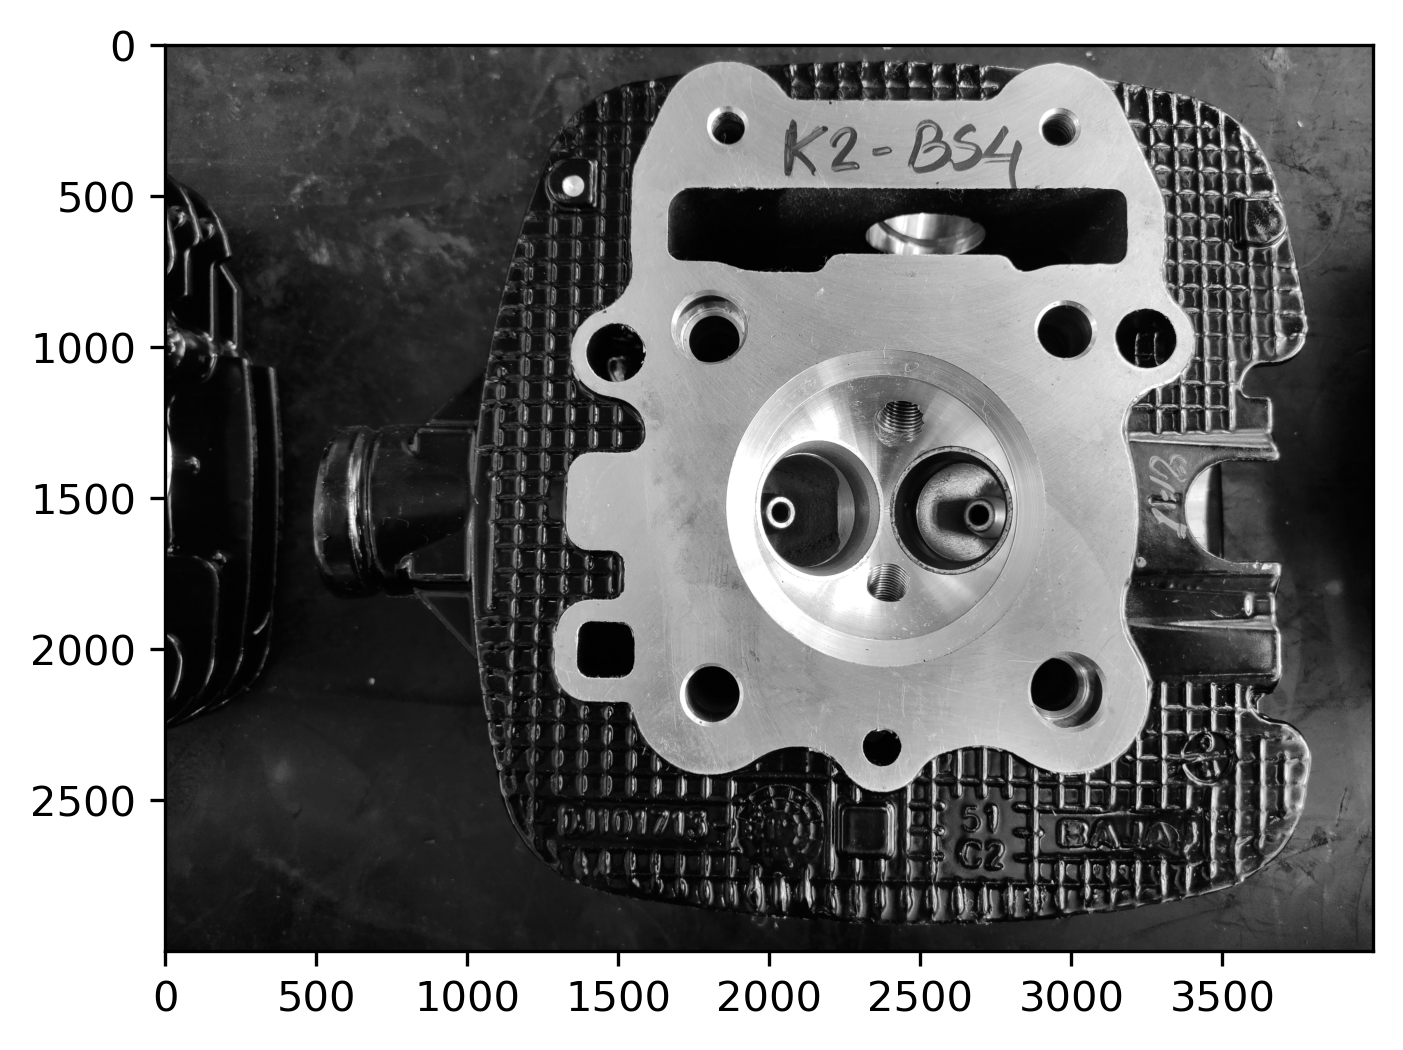

In [88]:
img = cv2.imread('./data/IMG_20200701_173221.jpg', 0)
plt.imshow(img, cmap = 'gray')

True

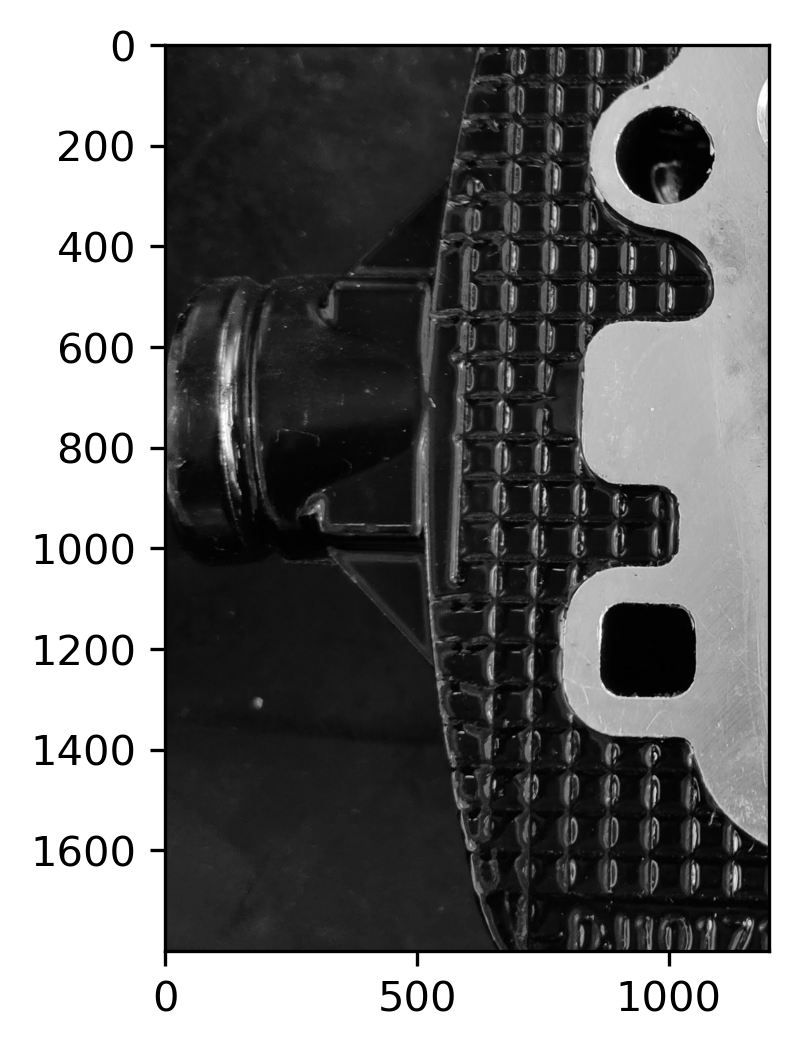

In [90]:
img1 = img.copy()
img_crop = img1[800:2600,500:1700]
plt.imshow(img_crop, cmap='gray')
cv2.imwrite('templates/k2bs4.png', img_crop)

In [91]:
# Making this crop as a template

template = img_crop
w, h = template.shape[::-1]
# plt.imshow(template)

In [92]:
# All the 6 methods for comparison in a list
# methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
#             'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
methods = ['cv2.TM_CCOEFF']

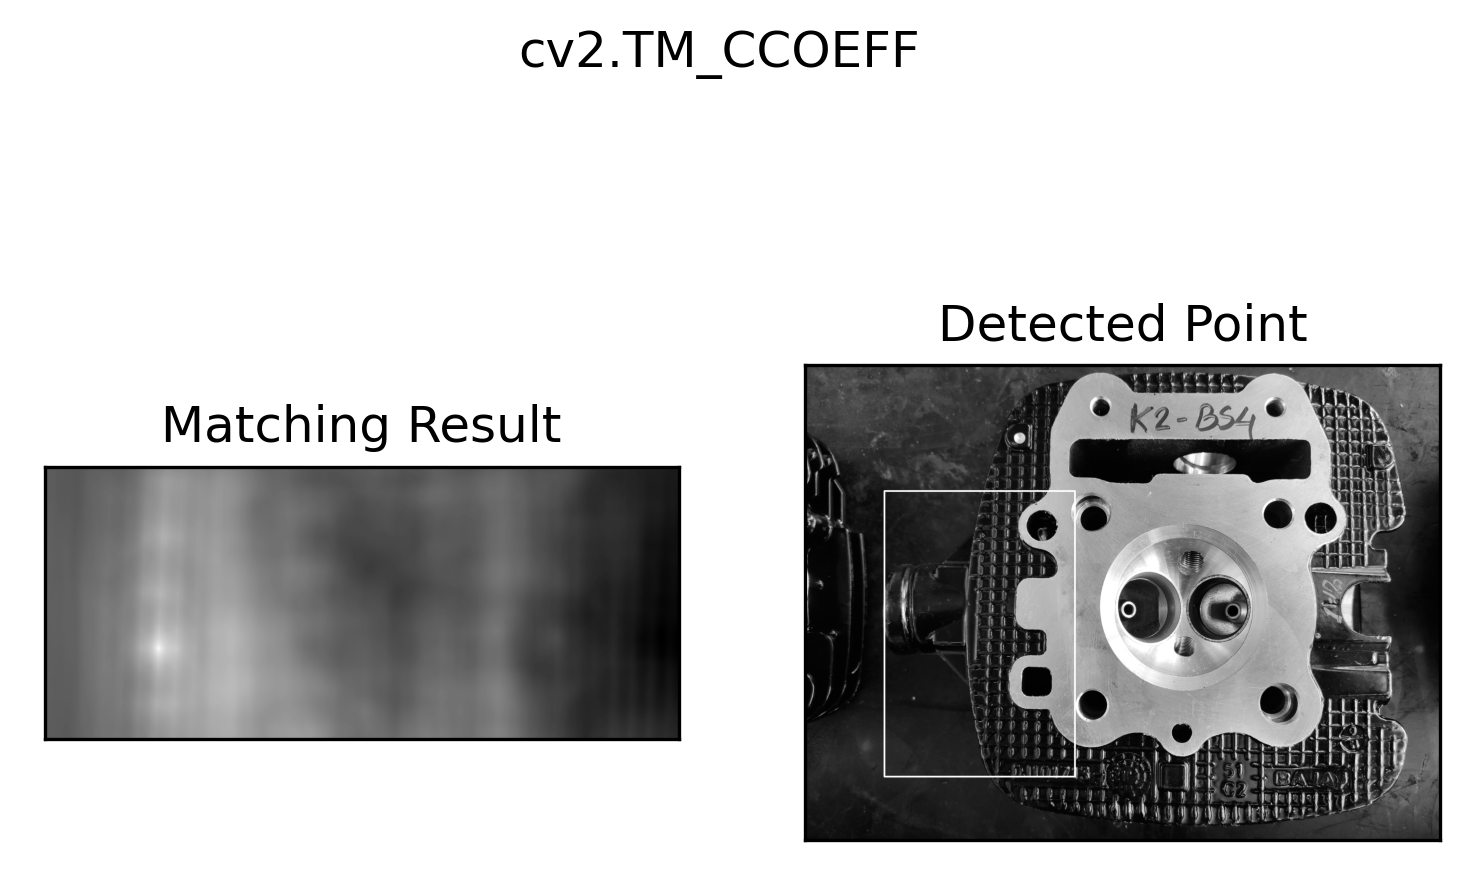

7911001088.0


In [93]:
for meth in methods:
    inim = img.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(inim,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(inim,top_left, bottom_right, 255, 10)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(inim,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()
    print(max_val)